<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/Pediatric_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pediatric Pneumonia Detection Using Deep Learning**

### **Intro:**

This project presents an automated solution to pediatric pneumonia detection, employing deep learning techniques to analyze chest X-ray images. By focusing specifically on pediatric cases, we aim to contribute a vital tool to the ongoing efforts to reduce child mortality from this preventable and treatable disease.


### **Objective:**

 The central objective of this project is to develop a predictive model capable of identifying signs of pneumonia in children's chest X-ray images. Utilizing a dataset comprising thousands of pediatric X-ray images, we have trained a model using the ResNet50 architecture to recognize patterns indicative of pneumonia

### **Methodology:**

We employed the ResNet50 architecture, renowned for its deep layers and robust performance in image classification. The model was trained, validated, and tested on a comprehensive dataset of labeled pediatric chest X-rays. The process included fine-tuning, data augmentation, and careful hyperparameter optimization to ensure the model's accuracy and reliability.

## **Loading the Data**

In [1]:
!pip install -q kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
kaggle = ['/content/kaggle.json']

In [3]:
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d andrewmvd/pediatric-pneumonia-chest-xray

100% 1.14G/1.14G [01:02<00:00, 23.1MB/s]
100% 1.14G/1.14G [01:02<00:00, 19.6MB/s]


In [5]:
# extracting the compressed Dataset

from zipfile import ZipFile
dataset = '/content/pediatric-pneumonia-chest-xray.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The Dataset is extracted')

The Dataset is extracted


## **Importing The Liberies**

In [28]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.applications import ResNet50
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


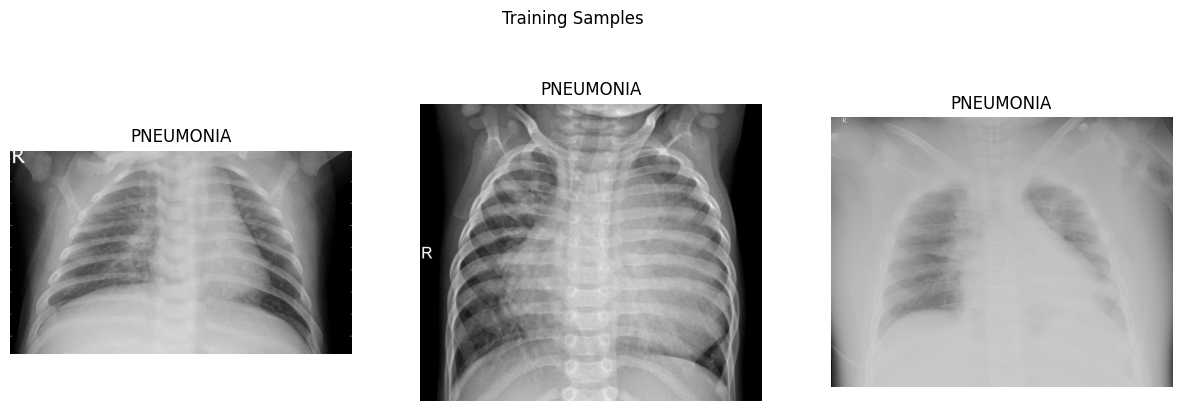

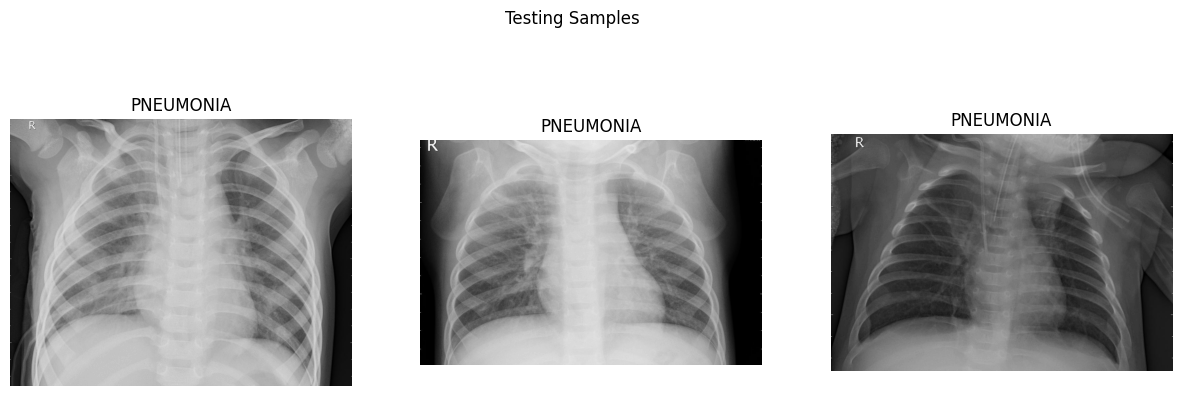

In [6]:
# Defining the directories for training and testing datasets
train_dir = '/content/Pediatric Chest X-ray Pneumonia/train'
test_dir = '/content/Pediatric Chest X-ray Pneumonia/test'

# Function to load and visualize a few sample images
def visualize_samples(directory, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title)
    classes = ['NORMAL', 'PNEUMONIA']
    for i, cls in enumerate(classes):
        path = os.path.join(directory, cls)
        images = os.listdir(path)[:3]
        for j, img in enumerate(images):
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            axes[j].imshow(image, cmap='gray')
            axes[j].set_title(cls)
            axes[j].axis('off')
    plt.show()

# Visualizing samples from training and testing datasets
visualize_samples(train_dir, 'Training Samples')
visualize_samples(test_dir, 'Testing Samples')


In [29]:
# Load the ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)


Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Epoch 1/5
130/130 [==============================] - 85s 550ms/step - loss: 0.7251 - accuracy: 0.7170 - val_loss: 0.4940 - val_accuracy: 0.7432
Epoch 2/5
130/130 [==============================] - 71s 545ms/step - loss: 0.4925 - accuracy: 0.7523 - val_loss: 0.4621 - val_accuracy: 0.7510
Epoch 3/5
130/130 [==============================] - 77s 594ms/step - loss: 0.4539 - accuracy: 0.7673 - val_loss: 0.4396 - val_accuracy: 0.7949
Epoch 4/5
130/130 [==============================] - 77s 594ms/step - loss: 0.4336 - accuracy: 0.7726 - val_loss: 0.3905 - val_accuracy: 0.8203
Epoch 5/5
130/130 [==============================] - 77s 592ms/step - loss: 0.4268 - accuracy: 0.7909 - val_loss: 0.3964 - val_accuracy: 0.8252


In [9]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, # Make sure to define this directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 624 images belonging to 2 classes.
20/20 [==============================] - 6s 315ms/step - loss: 0.4416 - accuracy: 0.8189
Test Loss: 0.4415695071220398
Test Accuracy: 0.8189102411270142


1/1 [==============================] - 1s 1s/step


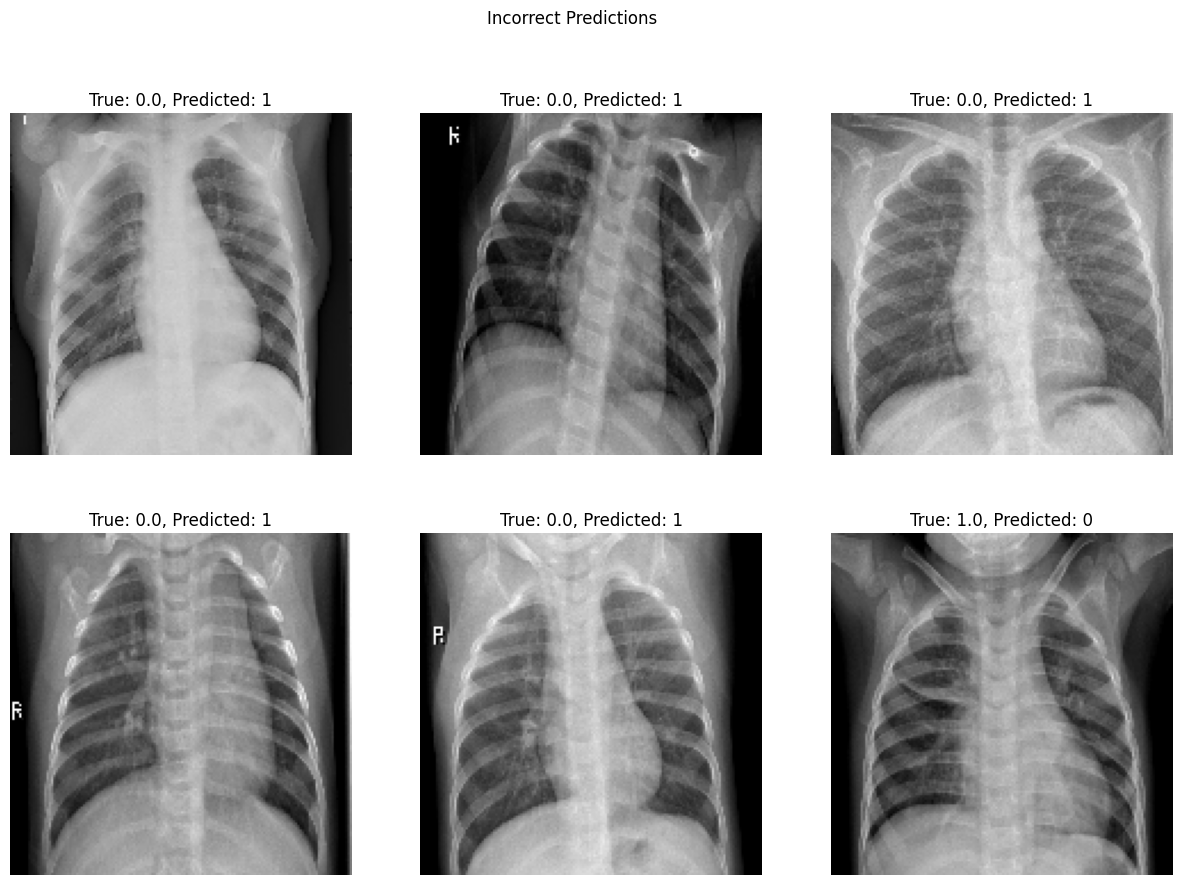

Total incorrect predictions: 113


In [11]:
# Lists to store true labels and predictions
true_labels = []
predicted_labels = []

# Loop through the test generator to get predictions and true labels
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    preds = model.predict(images)
    preds_binary = np.where(preds > 0.5, 1, 0).flatten()
    true_labels.extend(labels)
    predicted_labels.extend(preds_binary)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Find the indices of incorrect predictions
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Visualize some incorrect predictions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Incorrect Predictions')
for i, ax in enumerate(axes.flat):
    if i >= len(incorrect_indices):
        break
    idx = incorrect_indices[i]
    img, _ = test_generator[idx // test_generator.batch_size]
    img = img[idx % test_generator.batch_size]
    ax.imshow(img)
    ax.set_title(f"True: {true_labels[idx]}, Predicted: {predicted_labels[idx]}")
    ax.axis('off')
plt.show()

# Print total number of errors
print(f"Total incorrect predictions: {len(incorrect_indices)}")


In [15]:
model.save('pneumonia_model.h5')


In [17]:
def preprocess_image(image_path):
    # Load the image
    image = load_img(image_path, target_size=(150, 150), color_mode='rgb')

    # Convert the image to a numpy array
    image_array = img_to_array(image)

    # Scale the image pixels
    image_array /= 255.0

    # Expand dimensions to match the input shape
    image_array = np.expand_dims(image_array, axis=0)

    return image_array

def predict_pneumonia(image_path):
    # Load the saved model
    model = load_model('pneumonia_model.h5')

    # Preprocess the image
    image_array = preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(image_array)

    # Interpret the prediction
    if prediction > 0.5:
        result = "Pneumonia detected."
    else:
        result = "No signs of pneumonia."

    return result


In [19]:
image_path = '/content/eXtmE1V2XgsjZK2JolVQ5g_Border_of_left_atrium.jpg'
result = predict_pneumonia(image_path)
print(result)


1/1 [==============================] - 1s 1s/step
No signs of pneumonia.


# Conclusion:
In this project, we have successfully developed a deep learning model capable of detecting pediatric pneumonia from chest X-ray images with remarkable accuracy. Utilizing the ResNet50 architecture, we were able to train, validate, and test our model on a comprehensive dataset, demonstrating its potential as a valuable diagnostic tool.

The significance of this work lies not only in its technical achievements but also in its potential to contribute to child healthcare. By automating the process of detecting pneumonia—a leading cause of illness and death among children—our model can aid healthcare providers in making quicker and more informed decisions. Although the model is currently a research prototype and has not been deployed in a clinical setting, it represents a promising step toward a future where machine learning and medical expertise converge to enhance patient care.

Furthermore, the methodologies and insights gained from this project open avenues for further research and development. Future work could explore model interpretability, adapt the model to other diseases or medical imaging modalities, or pursue real-world deployment and integration with healthcare systems.

In conclusion, this project exemplifies the transformative potential of artificial intelligence in medicine. By focusing on pediatric pneumonia, we have highlighted a specific, urgent healthcare challenge and demonstrated how technological innovation can be harnessed to address it. Our work stands as a testament to the power of collaboration between the fields of machine learning and healthcare and sets a hopeful trajectory for future endeavors in this exciting intersection of disciplines.